# Mathematics of Machine Learning

## Chapter 3: Linear classification methods

### Section 3.4: Soft SVM Rule

In [19]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
plt.rc('font', size=16)

#### (0) Data Preparation

Generate the training data

In [20]:
# Size of the dataset
m = 25

# Random samples of features in [-3,3]
rng = np.random.default_rng(seed=42)
x = rng.uniform(low=-3, high=3, size=(2, m))  # 2 rows, m columns

In [21]:
# true parameters for logistic hypothesis 
w_true = np.array([1, 2])

# Probabilities for label +1 according to the Bernoulli model with h_{w_true,0}
p = 1/(1 + np.exp(-w_true @ x))

# Sample the random labels according to the probabilities p
y = 2*(rng.uniform(low=0, high=1, size=m) <= p) - 1

#### (1) Apply soft SVM rule

In [22]:
# Define loss function
def hinge(w, x, y):
    tmp = 1 - y * (w @ x)
    # stack two row vectors
    return np.max(np.vstack( (tmp, np.zeros(y.shape[0])) ), axis=0) # axis=0 only computes column maxima

In [23]:
# Choose regularization paramter such 
# that both terms are equally weighted
lam = 1/m

# Define regularized empirical risk
RS_reg = lambda w,x,y,lam: np.mean(hinge(w, x, y)) + lam * np.linalg.norm(w)**2

# Compute the minimizer of RS_reg
w_S, RS_reg_min, iter, funcalls, warnflag = opt.fmin(func = RS_reg, x0 = np.zeros(2),  args=(x, y, lam),
                                                   maxiter=1000, full_output=True, disp=False)
print(w_S)
print(RS_reg_min)
print(iter)

[0.16693624 0.80761225]
0.476867612399277
57


 #### (1.1) Plot the objective function

In [95]:
# discretize w1 and w2
w_lim = np.zeros(2)
w_lim[0] = max(abs(w_S[0]), abs(w_true[0])) 
w_lim[1] = max(abs(w_S[1]), abs(w_true[1])) 

w1 = np.arange(-5*abs(w_lim[0]), 5*abs(w_lim[0]) + 10*abs(w_lim[0])/1000, 10*abs(w_lim[0])/1000) 
w2 = np.arange(-5*abs(w_lim[1]), 5*abs(w_lim[1]) + 10*abs(w_lim[1])/1000, 10*abs(w_lim[1])/1000)

# Generate discretization grid
WW1, WW2 = np.meshgrid(w1, w2)
W1 = np.ravel(WW1)
W2 = np.ravel(WW2)

In [96]:
RR = np.zeros(len(W1))
for i in range(len(W1)):
    ww = np.array([W1[i], W2[i]])
    RR[i] = RS_reg(ww, x, y, lam)

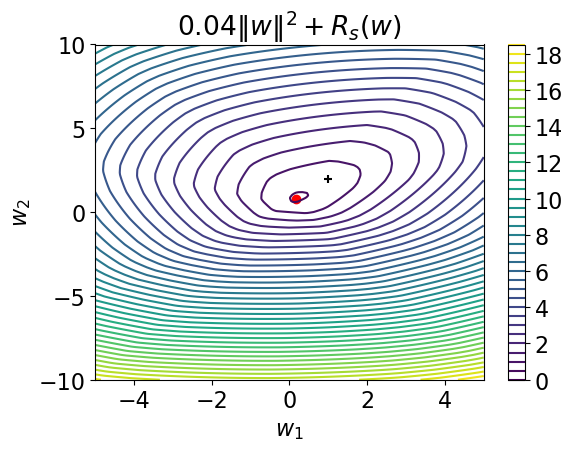

In [97]:
# Generate graphic (contour plot)
fig, ax = plt.subplots()

#CS = ax.contour(WW1, WW2, np.reshape(np.log(FW), (len(w1), len(w2))), 25)
CS = ax.contour(WW1, WW2, np.reshape(RR, (len(w1), len(w2))), 35)

# plot learned value
ax.scatter(w_S[0], w_S[1], c="r")
# true
ax.scatter(w_true[0], w_true[1], marker="+", c="k")

ax.set_title(f"${lam:.2f} \|w\|^2 + R_s(w)$")
ax.set_xlabel('$w_1$')
ax.set_ylabel('$w_2$')
fig.colorbar(CS)
plt.tight_layout()
plt.show()

#### (2) Plot the training data

Optimization terminated successfully.
         Current function value: 0.392591
         Iterations: 62
         Function evaluations: 118


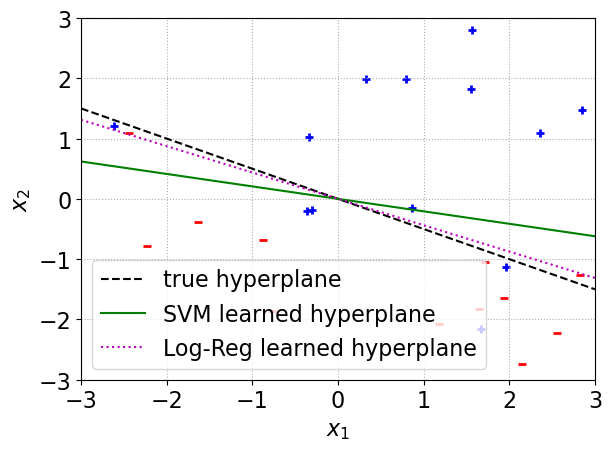

In [24]:
fig, ax = plt.subplots()
xvec = np.array([-3,3])
yvec = -w_true[0]/w_true[1]*xvec

# First plot the true hyperplane for x in [-3,3]
ax.plot(xvec, yvec, "--k", label="true hyperplane")

# Plot the learned hypothesis
ax.plot(xvec, -w_S[0]/w_S[1]*xvec, "-", c="g", label="SVM learned hyperplane")

# For comparison: plot logistic regression
RS_log = lambda w, x, y: np.mean(np.log(1 + np.exp(- y * (np.atleast_2d(w) @ x))), axis=1)  # mean over columns
w_LR, RS_log_min, iter_log, funcalls, warnflag = opt.fmin(func = RS_log, x0 = np.zeros(2), args=(x,y), maxfun=10000, full_output=True)

ax.plot(xvec, -w_LR[0]/w_LR[1]*xvec, ":", c="m", label="Log-Reg learned hyperplane")

# Then enter the classified points
inds = np.where(y==1)[0]
indm = np.where(y==-1)[0]

ax.scatter(x[0][inds], x[1][inds], c="b", marker="+", linewidths = 2)
ax.scatter(x[0][indm], x[1][indm], c="r", marker="_", linewidths = 2)

plt.legend()
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
ax.grid(linestyle='dotted')
ax.set(xlim=(-3, 3), ylim=(-3, 3))
fig.tight_layout()